In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [42]:
# This loads our iris data into a numpy array
iris = load_iris()

In [3]:
# We like working in pandas so we convert and label our columns
irisdf = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
# Let's describe our data
irisdf.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [5]:
# Now let's normalize our data and describe it again
# Import our library
from sklearn.preprocessing import MinMaxScaler
# Scale our data using minmax normalization
scaler = MinMaxScaler()
irisnormdf = pd.DataFrame(scaler.fit_transform(irisdf), columns = irisdf.columns)
# Let's now restore our target values
irisnormdf.target = irisnormdf.target * 2
# Now let's display our normalized dataframe
display(irisnormdf)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2.0
146,0.555556,0.208333,0.677966,0.750000,2.0
147,0.611111,0.416667,0.711864,0.791667,2.0
148,0.527778,0.583333,0.745763,0.916667,2.0


In [6]:
# Let's describe our data once again
irisnormdf.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,0.43,0.44,0.47,0.46,1.00
std,0.23,0.18,0.30,0.32,0.82
min,0.00,0.00,0.00,0.00,0.00
25%,0.22,0.33,0.10,0.08,0.00
50%,0.42,0.42,0.57,0.50,1.00
75%,0.58,0.54,0.69,0.71,2.00
max,1.00,1.00,1.00,1.00,2.00


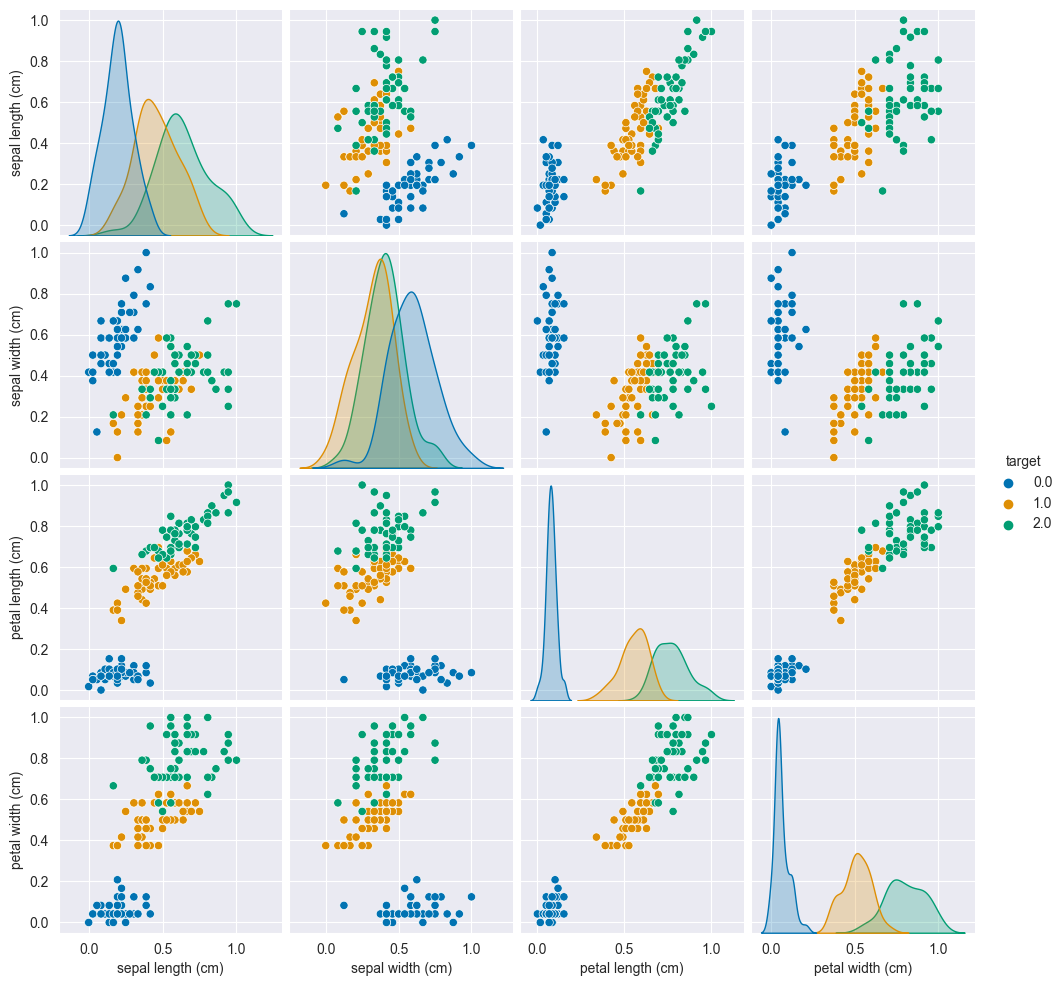

In [7]:
# Let's generate a pairplot and set our target labels as the hue, and use the colorblind colors
sns.pairplot(irisnormdf, hue='target', palette='colorblind')

<AxesSubplot: >

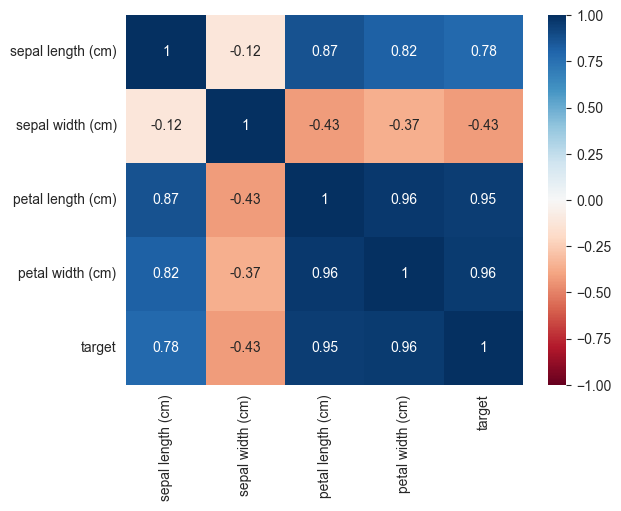

In [8]:
# Let's continue exploring our data by doing a heatmap of our correlation matrix called corr
corr = irisnormdf.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [9]:
# Let's remove species 2
petalsdf = irisnormdf[irisnormdf.target !=2][['petal length (cm)', 'petal width (cm)']]
display(petalsdf)
y = irisnormdf[irisnormdf.target !=2].target
display(y.unique())

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
95,0.542373,0.458333
96,0.542373,0.500000
97,0.559322,0.500000
98,0.338983,0.416667


array([0., 1.])

<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

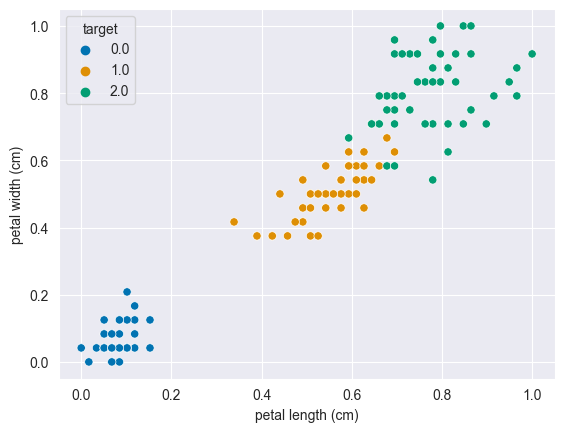

In [10]:
sns.scatterplot(data = irisnormdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = irisnormdf.target, palette='colorblind')

<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

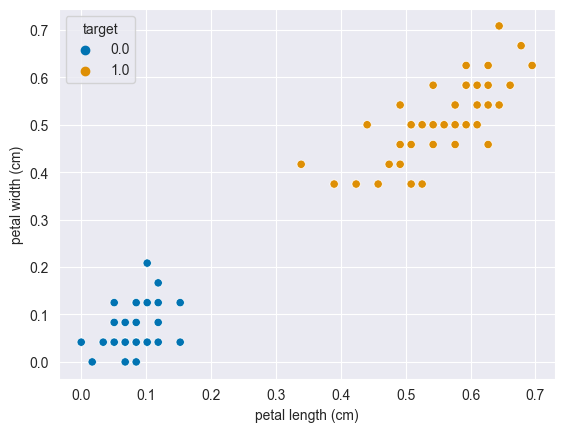

In [11]:
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y, palette='colorblind')

The problem above is we overlap with data, so we at least need to find a line and margin that doesn't overlap the data and instead touches on the boundaries of the points

### [SVM Linear classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [12]:
# import our svm libraries
from sklearn.svm import SVC

In [13]:
X_train, X_test, y_train, y_test = train_test_split(petalsdf, y, test_size=0.30)
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
yhat = svm.predict(X_test)

### import and print [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
#### [Display Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

In [15]:
# Let's create our confusion matrix and display it
myconfusionmatrix = confusion_matrix(y_test, yhat, labels=svm.classes_)
display(myconfusionmatrix)

array([[15,  0],
       [ 0, 15]], dtype=int64)

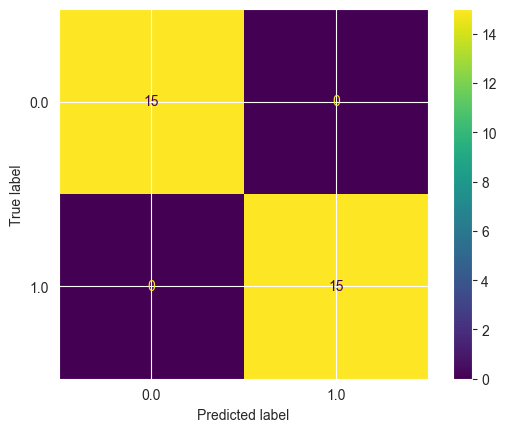

In [16]:
mycmdisp = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix, display_labels=svm.classes_)
mycmdisp.plot()

c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


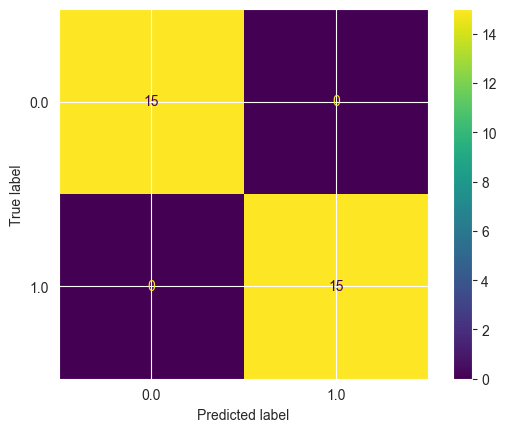

In [17]:
# This is the old method, only use if you don't have sklearn 1.0 or higher
plot_confusion_matrix(svm, X_test, y_test)

#### Print [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
#### Watch a [video](https://www.youtube.com/watch?v=jJ7ff7Gcq34) on precision, recall and f1-score

In [18]:
# Let's import our classification report and print it
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Print [classification score](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score)

In [19]:
svm.score(X_test,y_test)

1.0

#### Create a [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) using meshteps of 0.02 of our SVM

c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

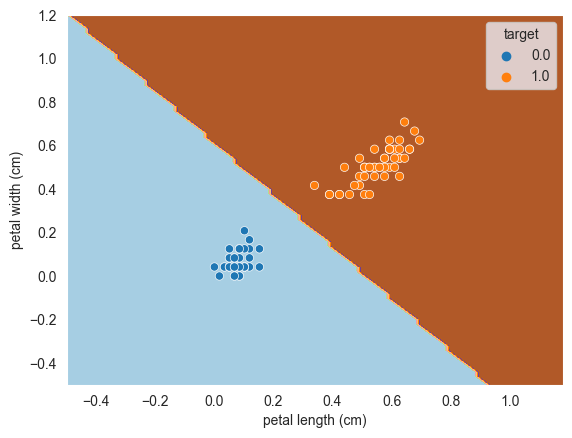

In [20]:
meshstep = .02
plotx_min, plotx_max = petalsdf['petal length (cm)'].min()-0.5, petalsdf['petal length (cm)'].max()+0.5
ploty_min, ploty_max = petalsdf['petal width (cm)'].min()-0.5, petalsdf['petal width (cm)'].max()+0.5
xx, yy = np.meshgrid(np.arange(plotx_min, plotx_max, meshstep),
                     np.arange(ploty_min, ploty_max, meshstep))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z)
plt.axis('tight')
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y)

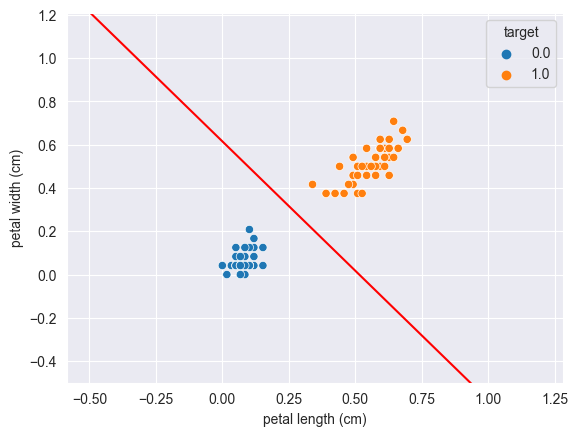

In [21]:
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y)

# Constructing a hyperplane using a formula.
# w consists of 2 elements
w = svm.coef_[0]
# b consists of 1 element
b = svm.intercept_[0]
# generating x-points from -1 to 1
x_points = np.linspace(plotx_min, plotx_max)
# getting corresponding y-points and plotting a red hyperplane
y_points = -(w[0] / w[1]) * x_points - b / w[1]
plt.plot(x_points, y_points, c='r');
plt.ylim(ploty_min, ploty_max);

[[15  0]
 [ 0 15]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


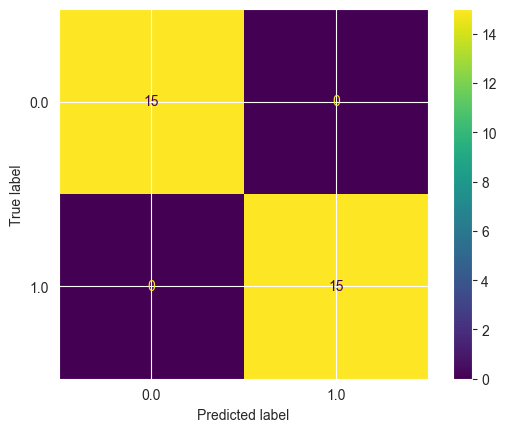

In [22]:
svmpoly = SVC(kernel='poly')
svmpoly.fit(X_train,y_train)
yhatpoly = svm.predict(X_test)
print(confusion_matrix(y_test, yhatpoly))
print(classification_report(y_test, yhatpoly))
print(svm.score(X_test,y_test))
plot_confusion_matrix(svmpoly, X_test, y_test)

c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

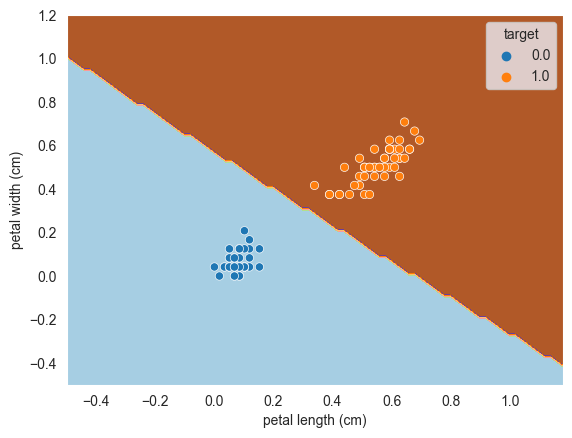

In [23]:
meshstep = .02
plotx_min, plotx_max = petalsdf['petal length (cm)'].min()-0.5, petalsdf['petal length (cm)'].max()+0.5
ploty_min, ploty_max = petalsdf['petal width (cm)'].min()-0.5, petalsdf['petal width (cm)'].max()+0.5
xx, yy = np.meshgrid(np.arange(plotx_min, plotx_max, meshstep),
                     np.arange(ploty_min, ploty_max, meshstep))
Z = svmpoly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z)
plt.axis('tight')
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y)

In [24]:
petalsdf = irisnormdf[['petal length (cm)', 'petal width (cm)']]
display(petalsdf)
y = irisnormdf.target
display(y)

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

[[15  0  0]
 [ 0 16  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.94      0.94      0.94        17
         2.0       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

0.9555555555555556


<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

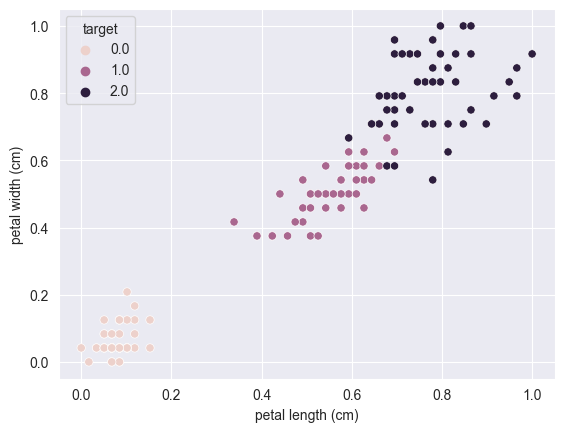

In [25]:
X_train, X_test, y_train, y_test = train_test_split(petalsdf, y, test_size=0.30)
svmpoly = SVC(kernel = 'poly', degree = 4)
svmpoly.fit(X_train,y_train)
yhatpoly = svmpoly.predict(X_test)
print(confusion_matrix(y_test, yhatpoly))
print(classification_report(y_test, yhatpoly))
print(svmpoly.score(X_test,y_test))
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y)


c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


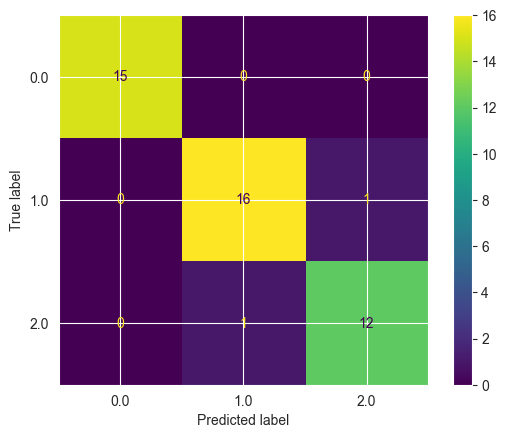

In [26]:
plot_confusion_matrix(svmpoly, X_test, y_test)

c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

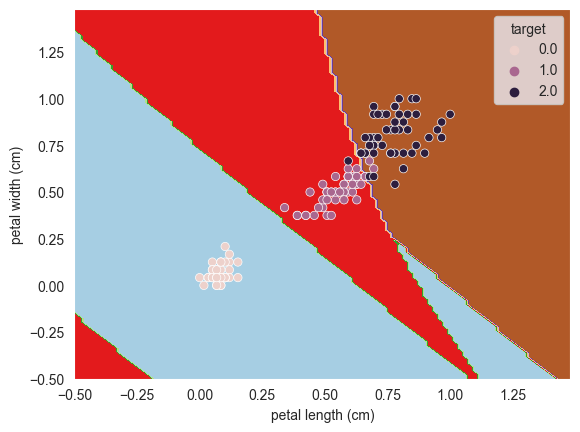

In [27]:
meshstep = .02
plotx_min, plotx_max = petalsdf['petal length (cm)'].min()-0.5, petalsdf['petal length (cm)'].max()+0.5
ploty_min, ploty_max = petalsdf['petal width (cm)'].min()-0.5, petalsdf['petal width (cm)'].max()+0.5
xx, yy = np.meshgrid(np.arange(plotx_min, plotx_max, meshstep),
                     np.arange(ploty_min, ploty_max, meshstep))
Z = svmpoly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z)
plt.axis('tight')
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y)

c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


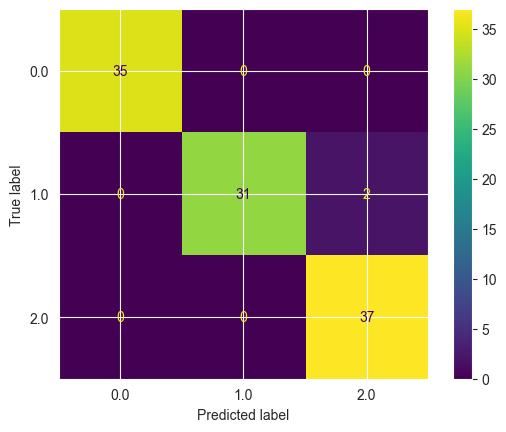

In [28]:
plot_confusion_matrix(svmpoly, X_train, y_train)

### Create a new feature based on X**2
#### create a [matplotlib 3d plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)
#### Docs on matplotlib colormaps [maplotlib.cm](https://matplotlib.org/stable/api/cm_api.html)
#### Gallery of differet matplotlib [colormaps](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

Text(0.5, 0, 'petal data squared')

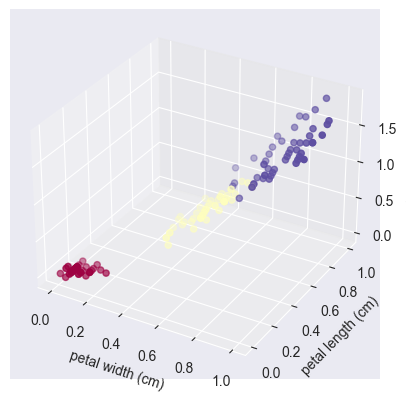

In [29]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ydata = petalsdf['petal length (cm)']
xdata = petalsdf['petal width (cm)']
zdata = (petalsdf**2).sum(1)
#zdata = np.exp(-(petalsdf**2).sum(1))
ax.scatter3D(xdata, ydata, zdata, c=y, cmap=cm.Spectral)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('petal data squared')

In [30]:
petalsdf.head(15)

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
5,0.118644,0.125000
6,0.067797,0.083333
7,0.084746,0.041667
8,0.067797,0.041667
9,0.084746,0.000000


In [31]:
(petalsdf**2).head(15)

,petal length (cm),petal width (cm)
0,0.004596,0.001736
1,0.004596,0.001736
2,0.002585,0.001736
3,0.007182,0.001736
4,0.004596,0.001736
5,0.014076,0.015625
6,0.004596,0.006944
7,0.007182,0.001736
8,0.004596,0.001736
9,0.007182,0.000000


In [32]:
(petalsdf**2).sum(1).head(15)

0     0.006332
1     0.006332
2     0.004322
3     0.008918
4     0.006332
5     0.029701
6     0.011541
7     0.008918
8     0.006332
9     0.007182
10    0.008918
11    0.012078
12    0.004596
13    0.000287
14    0.002885
dtype: float64

Text(0.5, 0, 'petal data squared')

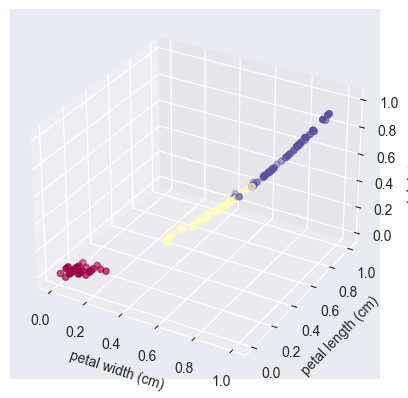

In [33]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ydata = irisnormdf['petal length (cm)']
xdata = irisnormdf['petal width (cm)']
zdata = irisnormdf['petal width (cm)']**2
ax.scatter3D(xdata, ydata, zdata, c=irisnormdf['target'], cmap=cm.Spectral)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('petal data squared')


In [34]:
X_train, X_test, y_train, y_test = train_test_split(petalsdf, y, test_size=0.30)
svmpoly = SVC()
svm.fit(X_train,y_train)


SVC(kernel='linear')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(petalsdf, y, test_size=0.30)
svmpoly = SVC(kernel = 'poly', degree = 4)
svmpoly.fit(X_train,y_train)
yhatpoly = svmpoly.predict(X_test)
print(confusion_matrix(y_test, yhatpoly))
print(classification_report(y_test, yhatpoly))
print(svmpoly.score(X_test,y_test))

[[16  0  0]
 [ 0 13  1]
 [ 0  2 13]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.87      0.93      0.90        14
         2.0       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

0.9333333333333333


c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


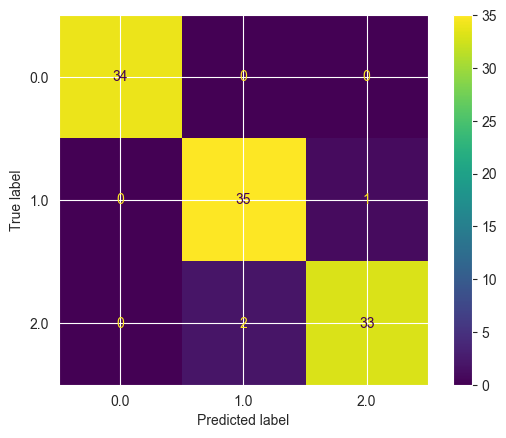

In [36]:
plot_confusion_matrix(svmpoly, X_train, y_train)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(petalsdf, y, test_size=0.30)
svmpoly = SVC(kernel = 'poly', degree = 6)
svmpoly.fit(X_train,y_train)
yhatpoly = svmpoly.predict(X_test)
print(confusion_matrix(y_test, yhatpoly))
print(classification_report(y_test, yhatpoly))
print(svmpoly.score(X_test,y_test))

[[14  0  0]
 [ 0 15  2]
 [ 0  0 14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      0.88      0.94        17
         2.0       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

0.9555555555555556


In [38]:
X_train, X_test, y_train, y_test = train_test_split(petalsdf, y, test_size=0.30)
svmpoly = SVC(kernel = 'rbf', degree = 3)
svmpoly.fit(X_train,y_train)
yhatpoly = svmpoly.predict(X_test)
print(confusion_matrix(y_test, yhatpoly))
print(classification_report(y_test, yhatpoly))
print(svmpoly.score(X_test,y_test))

[[18  0  0]
 [ 0 15  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        15
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

1.0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(petalsdf, y, test_size=0.30)
svmpoly = SVC(kernel = 'rbf', degree = 3)
svmpoly.fit(X_train,y_train)
yhatpoly = svmpoly.predict(X_test)
print(confusion_matrix(y_test, yhatpoly))
print(classification_report(y_test, yhatpoly))
print(svmpoly.score(X_test,y_test))

[[16  0  0]
 [ 0 12  0]
 [ 0  2 15]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.86      1.00      0.92        12
         2.0       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

0.9555555555555556


In [40]:
X_train, X_test, y_train, y_test = train_test_split(petalsdf, y, test_size=0.30)
svmpoly = SVC(kernel = 'rbf', degree = 4)
svmpoly.fit(X_train,y_train)
yhatpoly = svmpoly.predict(X_test)
print(confusion_matrix(y_test, yhatpoly))
print(classification_report(y_test, yhatpoly))
print(svmpoly.score(X_test,y_test))

[[13  0  0]
 [ 0 16  1]
 [ 0  2 13]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.89      0.94      0.91        17
         2.0       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

0.9333333333333333


In [41]:
X_train, X_test, y_train, y_test = train_test_split(petalsdf, y, test_size=0.30)
svmpoly = SVC(kernel = 'rbf', degree = 15)
svmpoly.fit(X_train,y_train)
yhatpoly = svmpoly.predict(X_test)
print(confusion_matrix(y_test, yhatpoly))
print(classification_report(y_test, yhatpoly))
print(svmpoly.score(X_test,y_test))

[[14  0  0]
 [ 0 14  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

1.0
